## Ildebrando Magnani

im975

Homework #4

This program shows the downward bias in the OLS estimate of α in the AR1 process 
X_t+1  =  αX_t  +  β  +  σW_t+1  , { W_t } ∼ N ( 0, 1 ) . 

The estimation is performed for different pairs of "true" alphas and sample sizes.




In [202]:
# Import the necessary tools
import numpy as np
import matplotlib.pyplot as plt
from numba import jit 

In [203]:
# Function that performs AR1 simulation and returns observations
def ar1_gen(N, alpha, beta, s):
    x_data = []
    x = beta / (1 - alpha)
    for i in range(N):
        x = beta + alpha * x + s * np.random.normal()
        x_data.append(x)
    x_datarray = np.asarray(x_data)
    x_lagged_obs = x_datarray[0:N-1]
    x_obs = x_datarray[1:N]
    x_data = []
    return x_lagged_obs, x_obs

In [207]:
# Define vector for sample sizes, vector for true alphas
N = np.linspace(50, 500, 10)
N_int = [int(k) for k in N]
alpha_vals = np.linspace(0.5, 0.9, 5)
biases = []

# Function that estimates alpha and returns array with biases for each pair of (alpha, sample size)
@jit
def alpha_bias(N, alphas):
    
    for x in alpha_vals: # For each value of alpha
        a = x    

        for n in range(len(N_int)): # For each sample size
            alpha_estimates = []
            
            for i in range(4000): # Run 1000 estimations
                xlag, x = ar1_gen(N_int[n], a, 1, 1)
                xlag_2 = xlag**2
                x2 = x**2
                xlag_times_x = xlag * x
                xlag_times_x_bar = xlag_times_x.mean()
                xlag_bar = xlag.mean()
                x_bar = x.mean()
                xlag_2_bar = xlag_2.mean()
                xlag_bar_2 = xlag_bar ** 2 
                cov = xlag_times_x_bar - (xlag_bar * x_bar)
                var = xlag_2_bar - xlag_bar_2
                alpha_est = cov / var
                alpha_estimates.append(alpha_est)
                alpha_estimates_array = np.asarray(alpha_estimates)
                
                  
            bias = alpha_estimates_array.mean() - a      # Compute biases
            biases.append(bias)
            alpha_estimates = []              
    
    return biases

In [205]:
%time alpha_bias(N_int, alpha_vals)

CPU times: user 1min 34s, sys: 852 ms, total: 1min 35s
Wall time: 1min 36s
-0.219514806049


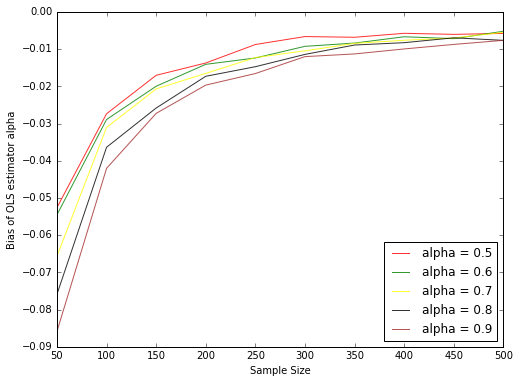

In [206]:
%matplotlib inline

# "Unpack" the values of the biases for different values of true alpha
a5 = biases[0:10]
a6 = biases[10:20]
a7 = biases[20:30]
a8 = biases[30:40]
a9 = biases[40:50]

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
x = np.linspace(50, 500, 10)
plt.plot(x, a5, color = 'red', linewidth=1, label = 'alpha = 0.5', alpha=0.8)
plt.plot(x, a6, color = 'green', linewidth=1, label = 'alpha = 0.6', alpha=0.8)
plt.plot(x, a7, color = 'yellow', linewidth=1, label = 'alpha = 0.7', alpha=0.8)
plt.plot(x, a8, color = 'black', linewidth=1, label = 'alpha = 0.8', alpha=0.8)
plt.plot(x, a9, color = 'brown', linewidth=1, label = 'alpha = 0.9', alpha=0.8)
plt.xlabel('Sample Size')
plt.ylabel('Bias of OLS estimator alpha')
ax.legend(loc='lower right')
plt.show()


The bias is downward and it converges asymptotically towards zero. The estimator for alpha clearly displays a greater (downward) bias as the true alpha value gets closer to 1.